## Step 1 : Import libraries & the dataset

In [2]:
import pandas as pd


# read Bikeshare dataset
df_bike = pd.read_csv("Bike.csv").rename(columns={'cnt' : 'cnt_rental_bike'})

# sample 7 random rows of the dataframe
df_bike.sample(7)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike
3685,3686,2011-06-07,2,0,6,11,0,2,1,2,0.76,0.6970,0.52,0.2537,38,113,151
16523,16524,2012-11-26,4,1,11,5,0,1,1,1,0.22,0.2273,0.69,0.1642,0,41,41
11301,11302,2012-04-21,2,1,4,2,0,6,0,1,0.52,0.5000,0.77,0.1343,12,69,81
6704,6705,2011-10-11,4,0,10,22,0,2,1,2,0.56,0.5303,0.83,0.1940,27,120,147
10654,10655,2012-03-25,2,1,3,1,0,0,0,2,0.42,0.4242,1.00,0.2537,24,65,89
7967,7968,2011-12-03,4,0,12,15,0,6,0,1,0.38,0.3939,0.46,0.0000,100,237,337
307,308,2011-01-14,1,0,1,7,0,5,1,1,0.10,0.1212,0.74,0.1642,0,70,70


## Step 2 : for the column 'weathersit', replace the values such as :  
1: 'clear'\
2: 'cloudy'\
3: 'light_rain'\
4: 'heavy_rain'

In [3]:
df_bike["weathersit"].replace({1,2,3,4},{'clear', 'cloudy', 'light_rain', 'heavy_rain'}, inplace=True)
df_bike.sample(7)

C:\Users\User\AppData\Local\Temp\ipykernel_24168\2128262641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bike["weathersit"].replace({1,2,3,4},{'clear', 'cloudy', 'light_rain', 'heavy_rain'}, inplace=True)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike
11101,11102,2012-04-12,2,1,4,18,0,4,1,clear,0.50,0.4848,0.27,0.3881,63,547,610
3076,3077,2011-05-13,2,0,5,2,0,5,1,cloudy,0.50,0.4848,0.88,0.1343,3,8,11
5093,5094,2011-08-05,3,0,8,3,0,5,1,clear,0.64,0.5909,0.78,0.0896,0,6,6
17347,17348,2012-12-30,1,1,12,16,0,0,0,clear,0.28,0.2424,0.38,0.4179,31,102,133
12938,12939,2012-06-28,3,1,6,7,0,4,1,clear,0.62,0.6061,0.61,0.1045,24,484,508
7037,7038,2011-10-25,4,0,10,20,0,2,1,clear,0.46,0.4545,0.67,0.1045,40,208,248
16119,16120,2012-11-09,4,1,11,9,0,5,1,clear,0.34,0.3030,0.53,0.4179,23,304,327


## Step 3 : Using pandas only, explore your dataset

In [4]:
#print(df_bike.head())
#print(df_bike.shape) #quantity of raw and columnss
#print(df_bike.info)
#print(df_bike.describe())
print(df_bike.isnull().sum())



instant            0
dteday             0
season             0
yr                 0
mnth               0
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         0
temp               0
atemp              0
hum                0
windspeed          0
casual             0
registered         0
cnt_rental_bike    0
dtype: int64


## Step 4 : The dataset has several columns related to date/time:

Create a new column `datetime` which will store information about both date and time.

In [5]:
#creating new row
df_bike['datetime'] = df_bike['dteday'] + ' ' + df_bike['hr'].astype(str)

#convert to format
df_bike['datetime'] = pd.to_datetime(df_bike['datetime'], format='%Y-%m-%d %H')

print(df_bike[['dteday', 'hr', 'datetime']].head())


       dteday  hr            datetime
0  2011-01-01   0 2011-01-01 00:00:00
1  2011-01-01   1 2011-01-01 01:00:00
2  2011-01-01   2 2011-01-01 02:00:00
3  2011-01-01   3 2011-01-01 03:00:00
4  2011-01-01   4 2011-01-01 04:00:00


## Step 5 : Vizualize the seasonality of rental bike

<Axes: title={'center': 'Seasonality of Rental Bikes'}, xlabel='Season', ylabel='Average Rentals'>

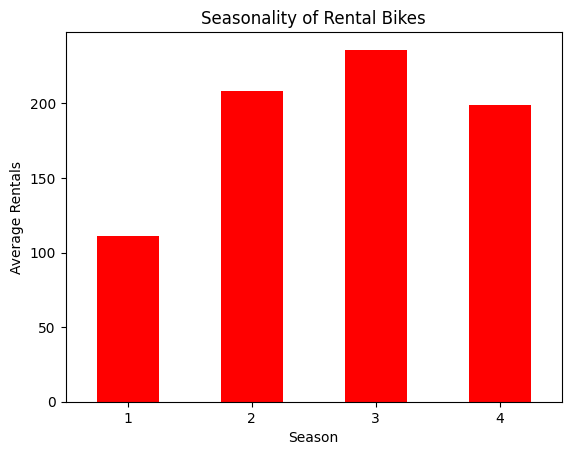

In [6]:
# Группировка данных по сезонам и построение графика
df_bike.groupby('season')['cnt_rental_bike'].mean().plot(
    kind='bar',
    title='Seasonality of Rental Bikes',
    color='red',
    ylabel='Average Rentals',
    xlabel='Season',
    rot=0
)


## Step 6 : What's the datatype of 'Wheathersit'

In [7]:
print(df_bike.columns)
print(df_bike['weathersit'].dtype)
print(df_bike.dtypes)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt_rental_bike', 'datetime'],
      dtype='object')
object
instant                     int64
dteday                     object
season                      int64
yr                          int64
mnth                        int64
hr                          int64
holiday                     int64
weekday                     int64
workingday                  int64
weathersit                 object
temp                      float64
atemp                     float64
hum                       float64
windspeed                 float64
casual                      int64
registered                  int64
cnt_rental_bike             int64
datetime           datetime64[ns]
dtype: object


## Step 7 : Count the values of Wheathersit and plot its distribution

<Axes: title={'center': 'distibution pf weather'}, ylabel='Count'>

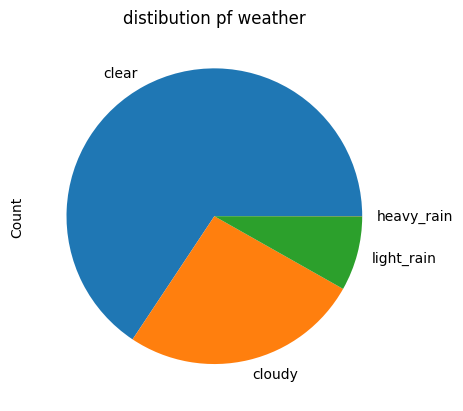

In [8]:
#df_bike['weathersit'].value_counts()
df_bike['weathersit'].value_counts().plot(
    kind ='pie',
    title='distibution pf weather',
    color = 'blue',
    ylabel='Count',
    xlabel='Type of the weather'
)

## Step 8 : What's the number of $K$ in this column.

In [9]:
# quantity'clear' column 'weathersit'
count_clear = (df_bike['weathersit'] == 'clear').sum()
print(f"Quantity of 'clear': {count_clear}")


Quantity of 'clear': 11413


## Step 9 : Implement your own One-Hot-Encoding algorithm. Encode weathersit column

In [10]:
#copy orig DataFrame
original_df = df_bike.copy()

#One-Hot Encoding
df_bike = pd.get_dummies(df_bike, columns=['weathersit'], prefix='weather', drop_first=False, dtype=int)

# return original column 'weathersit'
df_bike['weathersit'] = original_df['weathersit']

# Проверяем результат
print(df_bike.head())
print(df_bike.columns)


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   temp  ...  windspeed  casual  registered  cnt_rental_bike  \
0  0.24  ...        0.0       3          13               16   
1  0.22  ...        0.0       8          32               40   
2  0.22  ...        0.0       5          27               32   
3  0.24  ...        0.0       3          10               13   
4  0.24  ...        0.0       0           1                1   

             datetime  weather_clear weather_cloudy  weather_heavy_rain  \
0 2011-01-01 00:00:00              1              0                   0

## Step 10 : Use scikit-learn OHE encoder for the same column

In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

encoded_columns = encoder.fit_transform(df_bike[['weathersit']])
categories = encoder.categories_[0]
df_encoded = pd.DataFrame(encoded_columns, columns=categories)
df_bike = pd.concat([df_bike, df_encoded], axis=1)
print(df_bike.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   temp  ...            datetime  weather_clear  weather_cloudy  \
0  0.24  ... 2011-01-01 00:00:00              1               0   
1  0.22  ... 2011-01-01 01:00:00              1               0   
2  0.22  ... 2011-01-01 02:00:00              1               0   
3  0.24  ... 2011-01-01 03:00:00              1               0   
4  0.24  ... 2011-01-01 04:00:00              1               0   

   weather_heavy_rain  weather_light_rain  weathersit clear  cloudy  \
0                   0                   0       clear   1

## Step 11 : Compare your encoded columns with the SKLearn ones

In [12]:
pandas_encoded = df_bike.filter(like='weather_')
comparison = pd.concat([pandas_encoded.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)
print(comparison.head())
is_equal = pandas_encoded.equals(df_encoded)
print(f"identical or not? {is_equal}")



   weather_clear  weather_cloudy  weather_heavy_rain  weather_light_rain  \
0              1               0                   0                   0   
1              1               0                   0                   0   
2              1               0                   0                   0   
3              1               0                   0                   0   
4              1               0                   0                   0   

   clear  cloudy  heavy_rain  light_rain  
0    1.0     0.0         0.0         0.0  
1    1.0     0.0         0.0         0.0  
2    1.0     0.0         0.0         0.0  
3    1.0     0.0         0.0         0.0  
4    1.0     0.0         0.0         0.0  
identical or not? False


## Step 12 : Modify your algorithm to drop one column while encoding

In [13]:
original_df = df_bike.copy()
df_bike = pd.get_dummies(df_bike, columns=['weathersit'], prefix='weather', drop_first=True, dtype=int)

df_bike['weathersit'] = original_df['weathersit']
print(df_bike.head())
print(df_bike.columns)


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   temp  ...  weather_heavy_rain  weather_light_rain  clear  cloudy  \
0  0.24  ...                   0                   0    1.0     0.0   
1  0.22  ...                   0                   0    1.0     0.0   
2  0.22  ...                   0                   0    1.0     0.0   
3  0.24  ...                   0                   0    1.0     0.0   
4  0.24  ...                   0                   0    1.0     0.0   

   heavy_rain  light_rain weather_cloudy  weather_heavy_rain  \
0         0.0         0.0              0

## Step 13 : What are advantages and disadvantages of such encoding of a categorical varable? Does the answer depend on whether it is nominal or ordinal?

In [ ]:
One hot encoding is a very suitable for nominal data and also binary encoding doesnt need scaling because we only have 0 and 1
but we have Increasing the dimensionality of the data cause it creates n-1 columns and it can lead to errors if we have a alot of data



## Step 14 : What can be said about linear dependence of the columns produced by one-hot-encoding? Consider two cases: with and without dropping.

In [ ]:
Without dropping: columns are linearly dependent.
With dropping: linear dependence is removed.


## Step 15 : Repeat the steps 7 to 9, for label encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_bike['weathersit_encoded'] = label_encoder.fit_transform(df_bike['weathersit'])
print(df_bike['weathersit_encoded'].value_counts())


weathersit_encoded
0    11413
1     4544
3     1419
2        3
Name: count, dtype: int64


## Step 16 : Normalize some feature to a range [0, 1]

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_bike['temp_normalized'] = scaler.fit_transform(df_bike[['temp']])

print(df_bike[['temp', 'temp_normalized']].head())


   temp  temp_normalized
0  0.24         0.224490
1  0.22         0.204082
2  0.22         0.204082
3  0.24         0.224490
4  0.24         0.224490


## Step 17 : Standardize the same Feature(s) using standardization

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_bike['temp_standardized'] = scaler.fit_transform(df_bike[['temp']])

print(df_bike[['temp', 'temp_standardized']].head())


   temp  temp_standardized
0  0.24          -1.334648
1  0.22          -1.438516
2  0.22          -1.438516
3  0.24          -1.334648
4  0.24          -1.334648


## Step 18 : Explain the difference in resulting scales 

In [ ]:
Normalization scales data to a range [0, 1]
Example: [10, 20, 30] → [0, 0.5, 1]. It’s useful for models like KNN or SVM, sensitive to feature magnitudes.

Standardization centers data to mean 0 and standard deviation 1.
Example: [10, 20, 30] → [-1.22, 0, 1.22]. It’s ideal for algorithms like Linear Regression or PCA, assuming normally distributed data.